# Research Project

For our project we will implement **logistic regression** and train it to classify locations of high poverty and low poverty using satellite imagery of Uganda. This will be a complete machine learning experiment, using a training, validation, and testing set, so we will implement **cross validation** as well.

You will need to use, and fix, the functions in the following files:

### models.py [link](http://localhost:8888/edit/notebooks/project/models.py)

Contains **classes** for **LogisticRegression** and two **baseline** models: One that guesses randomly, and one that always guesses the most frequent class.

You will **not** need to change any code in this file, but you **will** need to instantiate these classes and call their **train** and **predict** methods in [model_helpers.py](http://localhost:8888/edit/notebooks/project/model_helpers.py).

### metrics.py [link](http://localhost:8888/edit/notebooks/project/metrics.py)

Provides a set of functions for judging how well your model performs given some data. The metrics include accuracy, f1 score, and area under the curve (auc).

You will **not** need to change any code in this file, but you **will** need to use these functions in the __cross_validation__ function in [experiment_helpers.py](http://localhost:8888/edit/notebooks/project/experiment_helpers.py).

### model_helpers.py [link](http://localhost:8888/edit/notebooks/project/model_helpers.py)

Contains training and prediction functions used by our **Logistic Regression** model.

**Your job is to complete the functions in this file! **

### experiment_helpers.py [link](http://localhost:8888/edit/notebooks/project/experiment_helpers.py)

Contains code for spliting up the data into **training** and **validation** sets, for both the **trucks and planes** and **Uganda** datasets. Also contains code for **cross validation**.

** Your job is to complete the functions in this file! **

## Project Instructions

This notebook provides more moving parts, and more chances to be creative with how your design your expriments. As a bit of guidance, we recommend doing things in this order:

(1) Look over the files [models.py](http://localhost:8888/edit/notebooks/project/models.py) and [metrics.py](http://localhost:8888/edit/notebooks/project/metrics.py). You do **not** need to understand every line of code, but try to get a general sense of the **functions** and **classes** contained in these files. Can you describe the inputs and outputs to each function?

(2) Complete the "create_trucksplanes_dataset" function in [experiment_helpers.py](http://localhost:8888/edit/notebooks/project/experiment_helpers.py). This function is **necessary** for creating the Trucks and Planes dataset that we can use to get a general sense for how logistic regression works.

(3) Complete the "predict_probability" function in [model_helpers.py](http://localhost:8888/edit/notebooks/project/model_helpers.py). This function is **necessary** for making predictions, and also training your model.

(4) Complete the "sgd" function in [model_helpers.py](http://localhost:8888/edit/notebooks/project/model_helpers.py). This function is **necessary** for training your model.

(5) **Optional:** Run the **Unit Testing** block in this notebook to see if there are any problems with "predict_probability" and "sgd". Don't worry about "batch_sgd" for now!

(6) Complete the **cross_validation** function in [experiment_helpers.py](http://localhost:8888/edit/notebooks/project/experiment_helpers.py). This is the "main function" for the entire project! When its complete, you can start getting experimental results on your training, validation, and testing sets!

(7) Run the first few blocks of this notebook to get results on the **Trucks and Planes** dataset.

(8) **Optional:** Complete the "batch_sgd" function in [model_helpers.py](http://localhost:8888/edit/notebooks/project/model_helpers.py). TYouu can complete the project without this function. But if you can figure it out, you may get better results!

(9) Time to do some real Poverty Mapping! Go back and complete the "create_uganda_dataset" in [experiment_helpers.py](http://localhost:8888/edit/notebooks/project/experiment_helpers.py).

(10) Run the **Classifying Poverty** block in this notebook. Adjust your hyperparameters, and improve your results.

(11) Run the final cell and see how well your model does on the Uganda test set!

### Remember: You must restart the Kernel (top bar) in order for your changes to other files to take effect! (Kernel >> Restart & Clear Output)

In [1]:
from utils.logistic_regression_utils import *
from utils.model_testers import *

from project.models import ALL_MODELS
from project.experiment_helpers import *

/Users/colinwei/virtualenvs/python3/ai4all2018/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Your Train-Test Split

After creating your datasets, run the code below to see the shape of your data matrices. Are you satisfied with how you've divided examples between the **training** and **validation** sets? How many **features** does each of your datasets have?

## Unit Testing

In big software projects like this, engineers usually do **Unit Tests**: We take small units of code and test them on a few inputs and outputs, to make sure their working. After implementing your model helper functions. Try running the tests below to see if you have any bugs you might have overlooked:


In [2]:
data_train, labels_train, data_validation, labels_validation = create_trucksplanes_dataset()
print("Trucks and Planes Dataset")
print("shape of training data: {}".format(np.shape(data_train)))
print("shape of validation data: {}".format(np.shape(data_validation)))

data_train, labels_train, data_validation, labels_validation = create_uganda_dataset()
print("Uganda Dataset")
print("shape of training data: {}".format(np.shape(data_train)))
print("shape of validation data: {}".format(np.shape(data_validation)))

### Extracting Trucks and Planes Dataset ###
Extracted 500 of 4184 histograms
Extracted 1000 of 4184 histograms
Extracted 1500 of 4184 histograms
Extracted 2000 of 4184 histograms
Extracted 2500 of 4184 histograms
Extracted 3000 of 4184 histograms
Extracted 3500 of 4184 histograms
Extracted 4000 of 4184 histograms
Extracted 4184 of 4184 histograms
Done!
Trucks and Planes Dataset
shape of training data: (3766, 91)
shape of validation data: (418, 91)
Uganda Dataset
shape of training data: (461, 4097)
shape of validation data: (51, 4097)


In [3]:
# checks if the predict_probability function returns the right probabilities.
test_predict_probability()
# checks if the sgd function returns the right weights.
test_sgd()
# checks if the batch_sgd function returns the right weights.
test_batch_sgd()

Your "predict_probability" function seems to be working!
Your "sgd" function seems to be working!
Your "batch_sgd" function seems to be working!


## Classifying Trucks and Planes

Before testing your code on a hard problem (like poverty mapping), it makes sense to make sure everything works for an easier one first. Run your implementation of **cross validation** below to launch your experiment on the **Trucks and Planes** dataset.

### Extracting Trucks and Planes Dataset ###
Extracted 500 of 4184 histograms
Extracted 1000 of 4184 histograms
Extracted 1500 of 4184 histograms
Extracted 2000 of 4184 histograms
Extracted 2500 of 4184 histograms
Extracted 3000 of 4184 histograms
Extracted 3500 of 4184 histograms
Extracted 4000 of 4184 histograms
Extracted 4184 of 4184 histograms
Done!
### STARTING CROSS VALIDATION ###


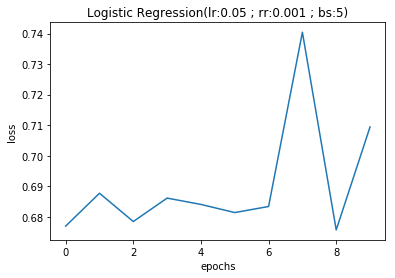

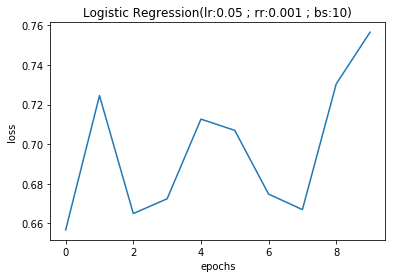

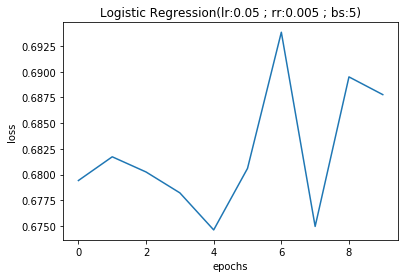

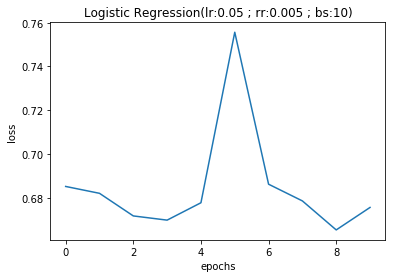

### FINISHED CROSS VALIDATION ###


In [4]:
best_trucks_and_planes_hyperparameters = cross_validation()

How does your model performance look on the validation set? When you're satisfied with its results, retrain your model using the **best hyperparameters** you found by running the code below:

### Extracting Trucks and Planes Dataset ###
Extracted 500 of 4184 histograms
Extracted 1000 of 4184 histograms
Extracted 1500 of 4184 histograms
Extracted 2000 of 4184 histograms
Extracted 2500 of 4184 histograms
Extracted 3000 of 4184 histograms
Extracted 3500 of 4184 histograms
Extracted 4000 of 4184 histograms
Extracted 4184 of 4184 histograms
Done!
Retraining model on ALL training data


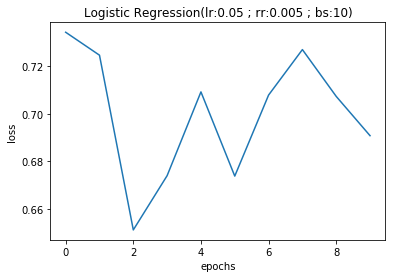

TRAINING RESULTS: 
Logistic Regression(lr:0.05 ; rr:0.005 ; bs:10) - acc: 0.66; auc: 0.66; f1: 0.70
TESTING RESULTS: 
Logistic Regression(lr:0.05 ; rr:0.005 ; bs:10) - acc: 0.63; auc: 0.63; f1: 0.68
TRAINING RESULTS: 
Random Guesser - acc: 0.51; auc: 0.52; f1: 0.50
TESTING RESULTS: 
Random Guesser - acc: 0.51; auc: 0.48; f1: 0.52
TRAINING RESULTS: 
Majority Guesser - acc: 0.51; auc: 0.50; f1: 0.00
TESTING RESULTS: 
Majority Guesser - acc: 0.49; auc: 0.50; f1: 0.00


In [5]:
X_t, y_t, X_v, y_v = create_trucksplanes_dataset()
data = np.concatenate([X_t, X_v], axis=0)
labels = np.concatenate([y_t, y_v])
_ = compute_final_results(best_trucks_and_planes_hyperparameters, ALL_MODELS, data=data, labels=labels)

## Classifying Poverty

Now it's time to see how our techniques perform for mapping poverty! Launch the next cell to do a complete machine learning experiment on the **Uganda Satellite Dataset** we downloaded at the beginning of the program.

### STARTING CROSS VALIDATION ###


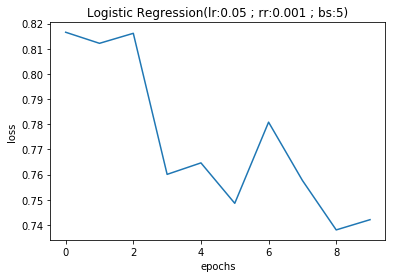

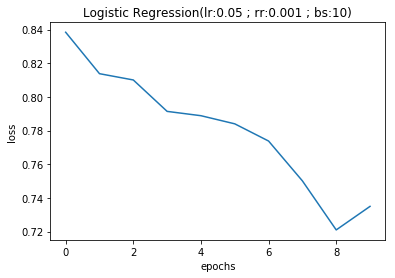

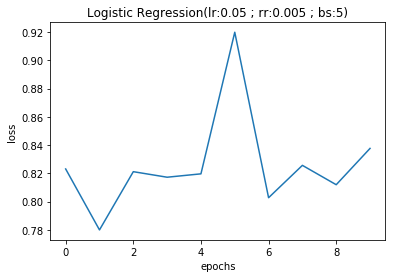

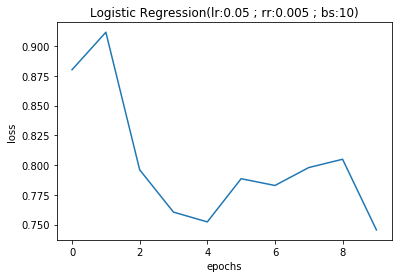

### FINISHED CROSS VALIDATION ###


In [6]:
best_uganda_hyperparameters = cross_validation(use_satellite = True)

## Improving Your Results

Getting your code to run and giving you an experimental result is only the first step! Its very important to experiment with different **hyperparameters** such as the **learning rate** and **regularization rate** to make sure model does as well as possible.

**Consider the following questions, and use them to improve your experimental design:**

* Which hyperparameters make the biggest difference? If you keep adjusting them, will you get a better result?
* Which metrics should we use to assess our model, and why? Does it make sense to combine different metrics during cross validation?
* Is your model overfitting? Can you avoid this by reducing the number of features, or making better use of your training data?

Retraining model on ALL training data


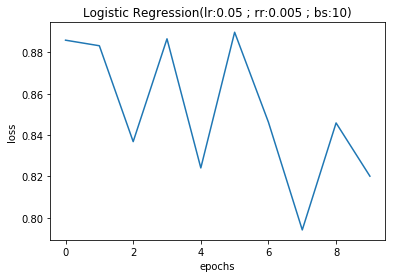

TRAINING RESULTS: 
Logistic Regression(lr:0.05 ; rr:0.005 ; bs:10) - acc: 0.63; auc: 0.69; f1: 0.49
TESTING RESULTS: 
Logistic Regression(lr:0.05 ; rr:0.005 ; bs:10) - acc: 0.58; auc: 0.69; f1: 0.44
TRAINING RESULTS: 
Random Guesser - acc: 0.52; auc: 0.50; f1: 0.29
TESTING RESULTS: 
Random Guesser - acc: 0.53; auc: 0.51; f1: 0.31
TRAINING RESULTS: 
Majority Guesser - acc: 0.78; auc: 0.50; f1: 0.00
TESTING RESULTS: 
Majority Guesser - acc: 0.81; auc: 0.50; f1: 0.00


In [7]:
trained_models = compute_final_results(
    best_uganda_hyperparameters, ALL_MODELS, use_satellite = True
)

## Mapping Poverty

The final step is to run your model for each location we've surveyed in Uganda and predict its probability of poverty. Locations with higher probability of being impoverished are shown in red. How does your map predict to the labeled data and the baseline models?

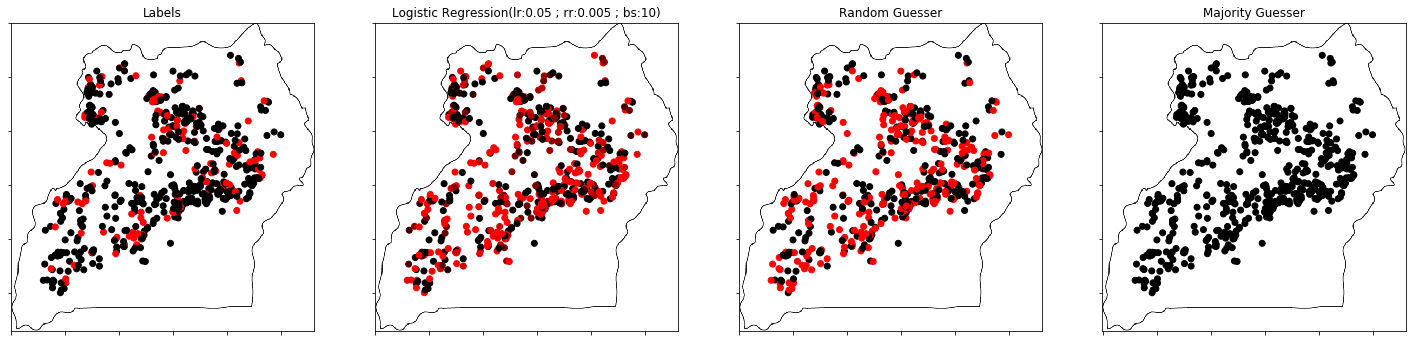

In [8]:
uganda_map(trained_models)